# WAVE

**Workshop for Analytical Visualization and Exploration**

This notebook shows what 'Visual Thinking' means and can be downloaded at http://github.com/dgmiller/portfolio.

The following are some examples of Visual Thinking:
+ Feynman Diagram: https://en.wikipedia.org/wiki/Feynman_diagram
+ Parable of the Polygons: http://ncase.me/polygons/
+ Gapminder: https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen?language=en
+ 3blue1brown: https://www.youtube.com/watch?v=PFDu9oVAE-g
+ A Visual Intro to Machine Learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
+ Rent or Buy?: http://www.nytimes.com/interactive/2014/upshot/buy-rent-calculator.html?_r=0
+ Gun Deaths in America: http://fivethirtyeight.com/features/gun-deaths/
+ Visualizing the internet: http://internet-map.net/
+ xkcd Earth Temperature: http://xkcd.com/1732/

Other links on perception and using words:
+ Using Words: http://writingcenter.unc.edu/handouts/sciences/
+ How we see color: https://www.pantone.com/how-do-we-see-color

In [1]:
import numpy as np
import pydataset
from scipy.stats import linregress
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
A1 = pydataset.data('Arbuthnot')
A2 = pydataset.data('anscombe')

**This data set is known as Anscombe's quartet.**

In [3]:
A2.head()

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47


Replace 'x1' and 'y1' in the cell below with two different corresponding columns. Calculate the mean, standard deviation, correlation coefficient, and regression line. The following cell plots each (x,y) pair.

In [4]:
print "Mean"
print A2[['x1','y1']].mean()
print "\nStandard Deviation"
print A2[['x1','y1']].std()
print "\nCorrelation Coefficient Matrix"
print np.corrcoef(A2['x1'].as_matrix(),A2['y1'].as_matrix())
print "\nLine of Best Fit"
eq1 = linregress(A2['x1'].as_matrix(),A2['y1'].as_matrix())
print 'y = %f x + %f' % (eq1[0],eq1[1])

Mean
x1    9.000000
y1    7.500909
dtype: float64

Standard Deviation
x1    3.316625
y1    2.031568
dtype: float64

Correlation Coefficient Matrix
[[ 1.          0.81642052]
 [ 0.81642052  1.        ]]

Line of Best Fit
y = 0.500091 x + 3.000091


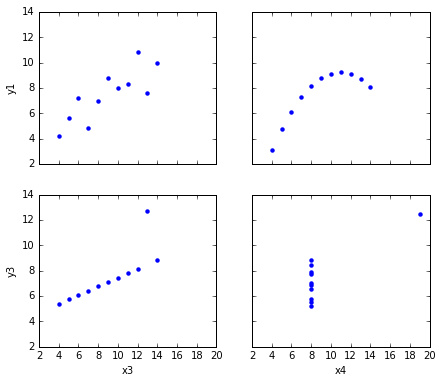

In [5]:
fig,ax = plt.subplots(2,2,sharex=True,sharey=True)
fig.set_figwidth(7)
fig.set_figheight(6)
A2[['x1','y1']].plot(kind='scatter',x='x1',y='y1',linewidth=0,ax=ax[0,0])
A2[['x2','y2']].plot(kind='scatter',x='x2',y='y2',linewidth=0,ax=ax[0,1])
A2[['x3','y3']].plot(kind='scatter',x='x3',y='y3',linewidth=0,ax=ax[1,0])
A2[['x4','y4']].plot(kind='scatter',x='x4',y='y4',linewidth=0,ax=ax[1,1])

# Designing a Visualization

*Design is thinking made visual.* -- Paul Bass

What does that quote even mean? How is thinking made visual? The principles of design are tools for communication. Below is an example of how to 'think visually' using data from Arbuthnot's birth rate dataset. For details on the data involved, run `pydataset('Arbuthnot', show_doc=True)`.

Pretend that after exploring the dataset, you decide that a scatter plot represents the data best. You want to know if there are more males born than females. Start with a simple default scatter plot. Each point represents a year with the x axis as the number of males christened and the y axis as the number of females christened.

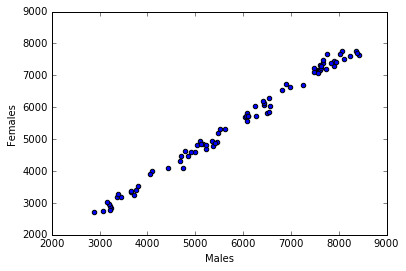

In [6]:
A1.plot(kind='scatter',x='Males',y='Females')

You expect the birth rates to be about the same for each sex. The graph above looks pretty close, but the lines forming the axes make a rectangular box. This makes it hard to compare birth rates so you make the axes equal.

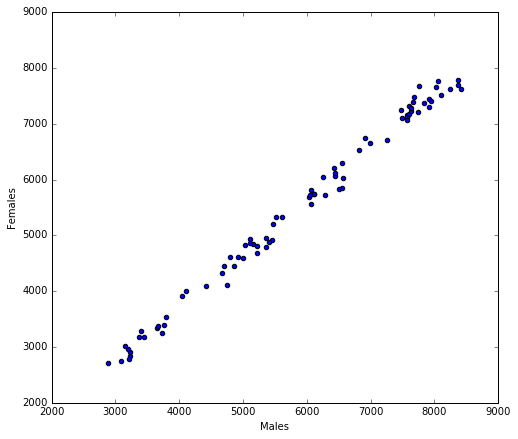

In [7]:
A1.plot(kind='scatter',x='Males',y='Females',figsize=(8,7))

Wow! It's a lot easier to compare along equivalent axes. Now what? Since you want to know if there are more males born than females, you draw the line where there would be equal male to female christening. You call this the parity line, parity meaning equal.

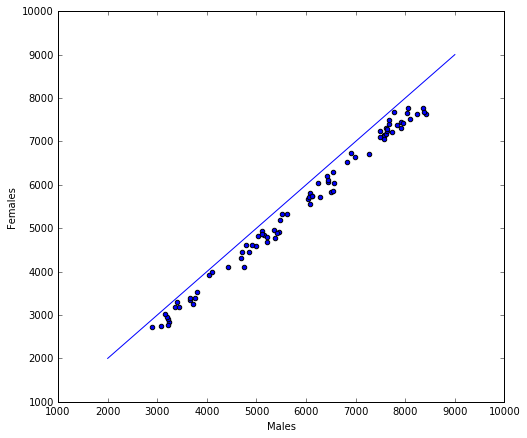

In [8]:
A1['parity'] = np.linspace(2000,9000,82)
ax = A1.plot(kind='scatter',x='Males',y='Females',figsize=(8,7))
ax.plot(A1['parity'],A1['parity'])
plt.show()

Now it's obvious. There are clearly more males christened than females. Arbuthnot ran a statistical significance test and concluded that there were more males christened than females. This graph does the same thing, but visually instead of computationally. The statistical significance test is precise but the graph makes the insight instantaneously clear.

Now, you need to communicate this insight to others. You need to figure out what to draw attention to in the graph. You care about the data points first because the data actually communicate the insight, not the line. You make the line grey so that it doesn't draw undue attention. You also extend the line to run from corner to corner to make the divide between male and female more explicit.

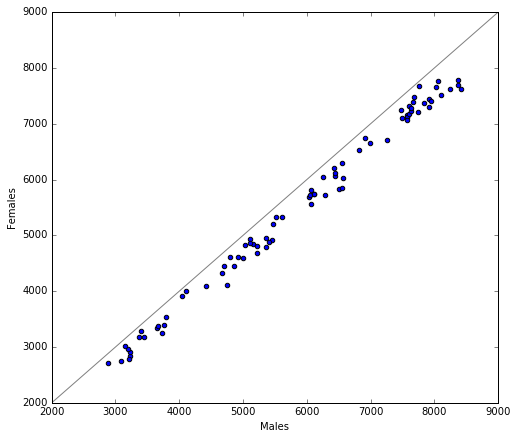

In [9]:
ax = A1.plot(kind='scatter',x='Males',y='Females',figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

The dots are a little dark. This is because there are lines drawn around the blue dots. Getting rid of those lines makes the dots stand out more.

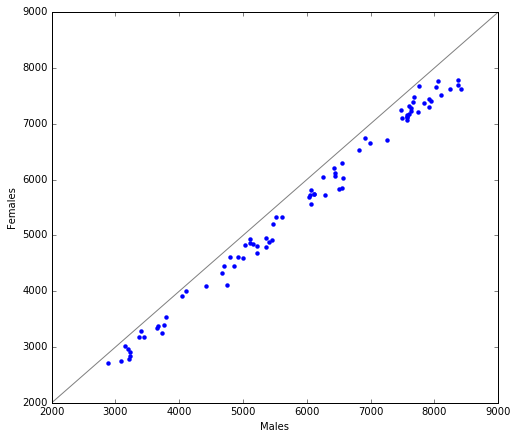

In [10]:
ax = A1.plot(kind='scatter',x='Males',y='Females',linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

The dots are a little bit small and harder to see. Making them bigger helps you see better.

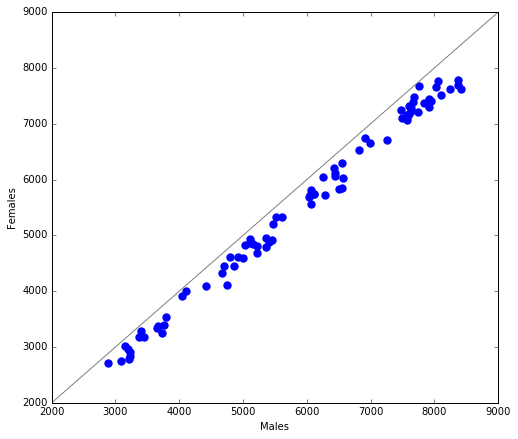

In [11]:
ax = A1.plot(kind='scatter',x='Males',y='Females',s=70,linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

The small dots gave you more precision but the big dots let you see where the dots line up on the axes. If you make the dots transparent...

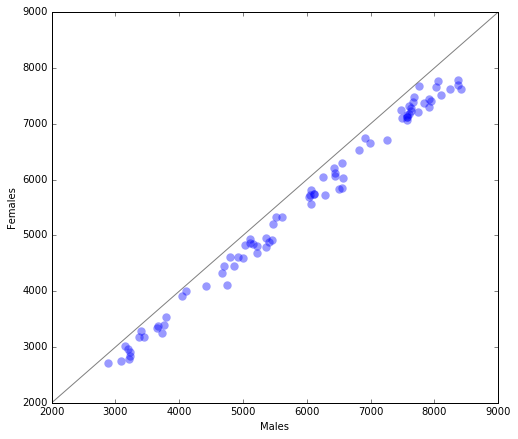

In [12]:
ax = A1.plot(kind='scatter',x='Males',y='Females',s=70,alpha=.4,linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

No information is lost! It's easier to see the density of the dots a little better. As a final touch, you change the dot color to red because humans have more red color receptors in our eyes, and that helps draw more attention to the dots.

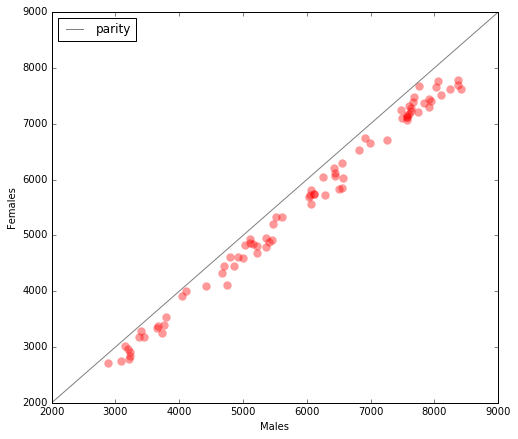

In [13]:
ax = A1.plot(kind='scatter',x='Males',y='Females',color='r',s=70,alpha=.4,linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
ax.legend(loc=0)
plt.show()

Compare this graph with the one we started with. A statistical significance test is hardly necessary to conclude that there were more male christenings than female christenings when we use the first graph. In this case, I can replace a lengthy explanation about statistical significance with a visualization. I am using my reasoning skills visually instead of mathematically. Both perspectives are valid approaches to analyzing data.

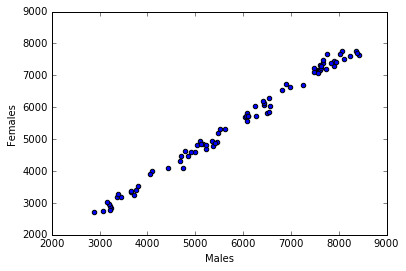

In [14]:
A1.plot(kind='scatter',x='Males',y='Females')

To finish, you should consider adding a title and some explanatory comments about the data (where it came from, how the data were collected). Whenever you use data to communicate, be transparent and accept resposibility for your work.